In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler

from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'myClass'

In [7]:
csv = Path("C:/Users/SHUBHAM/PycharmProjects/ML practice/Data/Ecommerce Customers.csv")

df = pd.read_csv(csv.resolve() , usecols= {'Avg. Session Length' , 'Time on App' , 'Length of Membership' , 'Yearly Amount Spent'})
df.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,4.082621,587.951054
1,31.926272,11.109461,2.664034,392.204933
2,33.000915,11.330278,4.104543,487.547505
3,34.305557,13.717514,3.120179,581.852344
4,33.330673,12.795189,4.446308,599.406092


In [6]:
df.describe()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,3.533462,499.314038
std,0.992563,0.994216,0.999278,79.314782
min,29.532429,8.508152,0.269901,256.670582
25%,32.341822,11.388153,2.930450,445.038277
50%,33.082008,11.983231,3.533975,498.887875
75%,33.711985,12.753850,4.126502,549.313828
max,36.139662,15.126994,6.922689,765.518462


In [8]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [16]:
#prof = ProfileReport(df)
#prof.to_file(output_file = "report.html")

In [18]:
df.corr()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,0.060247,0.355088
Time on App,-0.027826,1.000000,0.029143,0.499328
Length of Membership,0.060247,0.029143,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,0.809084,1.000000


In [20]:
df.var()

Avg. Session Length        0.985182
Time on App                0.988465
Length of Membership       0.998556
Yearly Amount Spent     6290.834572
dtype: float64

In [8]:
# x , y split
x = df.iloc[: , 0:3]
y = df.iloc[: , 3]

x.shape

(500, 3)

<Axes: xlabel='Avg. Session Length', ylabel='Count'>

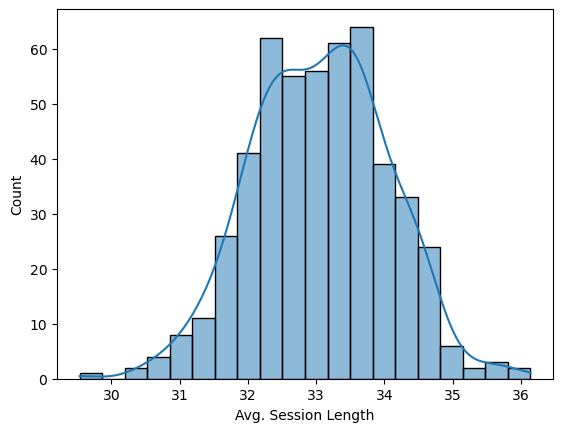

In [38]:
sns.histplot(x = x.iloc[: ,0] , kde = True )
# slightlt left skewed 

<Axes: xlabel='Time on App', ylabel='Count'>

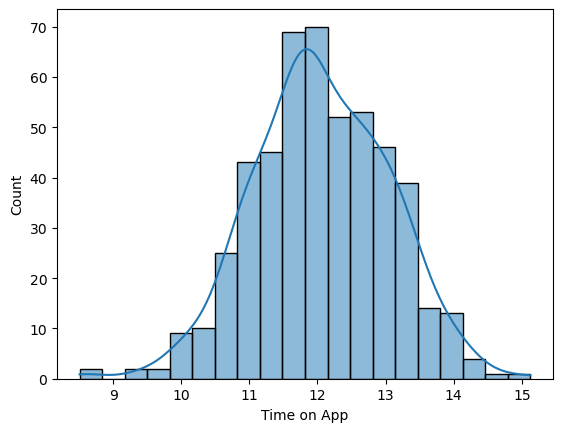

In [40]:
sns.histplot(x = x.iloc[: ,1] , kde = True )
# slightly left skewed

<Axes: xlabel='Length of Membership', ylabel='Count'>

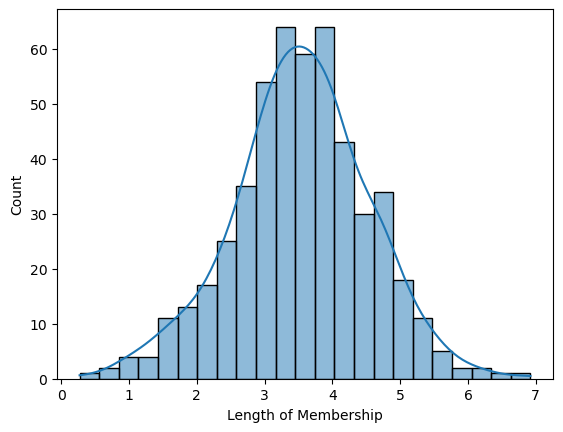

In [42]:
sns.histplot(x = x.iloc[: ,2] , kde = True )
# perfactlt distributed
# overall all columns are right distributed

<Axes: >

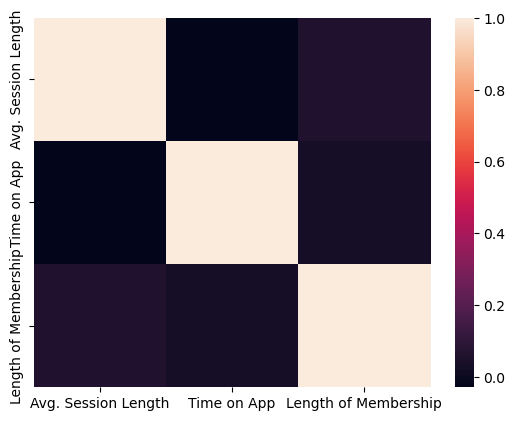

In [44]:
sns.heatmap(x.corr())
# we don't have corelated columns

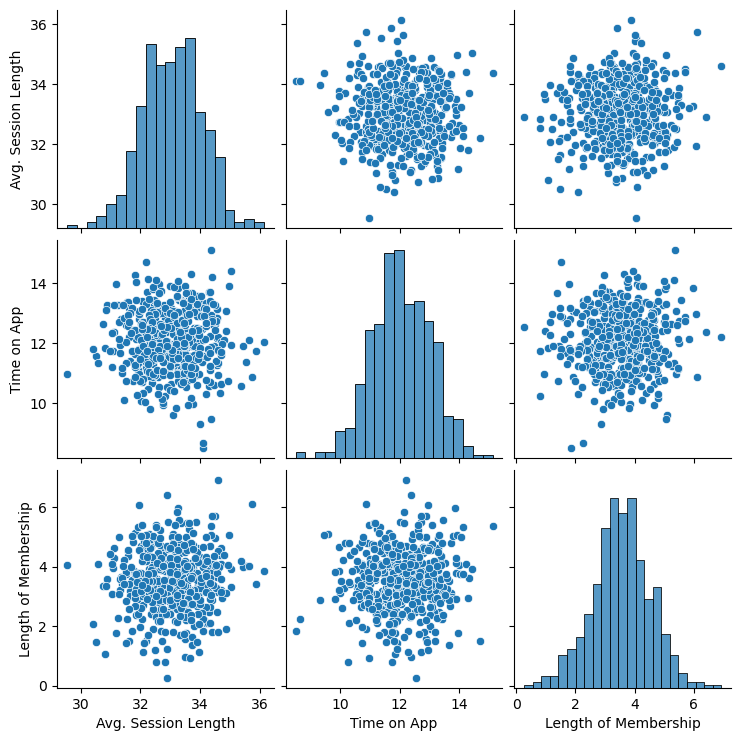

In [46]:
sns.pairplot(x)

In [6]:
import myClass

class BGDRegresser: # Batch gradient descent
    def __init__(self, learnig_rate , epochs):
        self.epochs = epochs
        self.lr = learnig_rate
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, x, y):
        self.intercept_ = 0
        self.coef_ = np.ones(x.shape[1])
        
        for i in range(self.epochs):
            
            y_hat = np.dot(x, self.coef_) + self.intercept_ #O(1) in time but load whole data in memory at same time
            intercept_der = -2 * np.mean(y - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der )

            coef_der = (-2/x.shape[0])*np.dot((y - y_hat) ,x)
            self.coef_ = self.coef_ - (self.lr * coef_der)
        print(self.coef_ , self.intercept_)
        
    def predict(self,x):
        return np.dot(x , self.coef_) + self.intercept_

import random
class MBGDRegresser:  # Mini batch gradient descent
    def __init__(self, learnig_rate : str , epochs , batch_size , eta0):
        self.epochs = epochs
        self.lr = learnig_rate
        self.coef_ = None
        self.intercept_ = None
        self.batch_size = batch_size
        self.eta0 = eta0
        self.sgd = SGDRegressor(max_iter=self.epochs , learning_rate= self.lr ,  eta0 = self.eta0)
        
    def fit(self, x, y):
        batch_size = self.batch_size
 
        for i in range(50):
            index = random.sample(range(x.shape[0]) , batch_size)
            self.sgd.partial_fit(x[index] , y[index])
          
        print(self.sgd.coef_ , self.sgd.intercept_)
        
    def predict(self,x):
        return self.sgd.predict(x)

ModuleNotFoundError: No module named 'myClass'

In [18]:
numerical_features = ['Avg. Session Length'	,'Time on App',	'Length of Membership']
numerical_trf = Pipeline(
    steps = [
                ('scaler' , StandardScaler())
            ]
)

preprocessor = ColumnTransformer(
    [
        ('num' , numerical_trf , numerical_features),
    ]
)

Linear_pipe = Pipeline(
    [
        ('preprocessor' , preprocessor),
        ('classifier' , LinearRegression())
    ]
)

batch_pipe = Pipeline(
    [
        ('preprocessor' , preprocessor),
        ('classifier' , BGDRegresser(learnig_rate=0.1 , epochs=100))
    ]
)

mini_batch_pipe = Pipeline(
    [
        ('preprocessor' , preprocessor),
        ('classifier' , MBGDRegresser(learnig_rate = 'invscaling' , epochs=50 , batch_size=20 , eta0=0.1)) # learnig_rate = 'invscaling ,constant , optimal , adaptive'
    ]
)

stochastic_pipe = Pipeline(
    [
        ('preprocessor' , preprocessor),
        ('classifier' , SGDRegressor(eta0 = 0.1 , learning_rate='invscaling' , max_iter=50))
    ]
)

In [20]:
Linear_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier', LinearRegression())])

In [22]:
batch_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier',
                 <__main__.BGDRegresser object at 0x000002971FB91D60>)])

In [24]:
mini_batch_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier',
                 <__main__.MBGDRegresser object at 0x000002971FB921E0>)])

In [26]:
stochastic_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier', SGDRegressor(eta0=0.1, max_iter=50))])

In [32]:
#train test split
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, random_state=11 , test_size = 0.2)

x_train = x_train.reset_index().iloc[:,1:]
x_test = x_test.reset_index().iloc[:,1:]
y_train = y_train.reset_index().iloc[:,1]
y_test = y_test.reset_index().iloc[:,1]


In [36]:
x_train.shape , x_test.shape

((400, 3), (100, 3))

In [38]:
Linear_pipe.fit(x_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier', LinearRegression())])

In [40]:
batch_pipe.fit(x_train , y_train)

[25.87590065 38.98256958 61.45086017] 499.6455296111291


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier',
                 <__main__.BGDRegresser object at 0x000002971FB91D60>)])

In [42]:
mini_batch_pipe.fit(x_train , y_train)

[25.2971578  39.63504853 60.48941441] [500.3509236]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier',
                 <__main__.MBGDRegresser object at 0x000002971FB921E0>)])

In [44]:
stochastic_pipe.fit(x_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg. Session Length',
                                                   'Time on App',
                                                   'Length of Membership'])])),
                ('classifier', SGDRegressor(eta0=0.1, max_iter=50))])

In [46]:
y_pred_linear = Linear_pipe.predict(x_test)
y_pred_bgd = batch_pipe.predict(x_test)
y_pred_mbgd = mini_batch_pipe.predict(x_test)
y_pred_sgd = stochastic_pipe.predict(x_test)

In [48]:
print('Linear Regression : ' , r2_score(y_test , y_pred_linear))
print('Batch Regression : ' , r2_score(y_test , y_pred_bgd))
print('Mini Batch Regression : ' , r2_score(y_test , y_pred_mbgd))
print('Stochastic Regression : ' , r2_score(y_test , y_pred_sgd))

Linear Regression :  0.9870380612759142
Batch Regression :  0.9870380613108689
Mini Batch Regression :  0.9868526021003012
Stochastic Regression :  0.987054468959234


# Exporting Pipelines

In [51]:
import pickle

In [53]:
pickle.dump(Linear_pipe , open('linear_pipe.pkl','wb'))
pickle.dump(batch_pipe , open('batch_pipe.pkl','wb'))
pickle.dump(mini_batch_pipe , open('mini_batch_pipe.pkl','wb'))
pickle.dump(stochastic_pipe , open('stochastic_pipe.pkl','wb'))

In [ ]:
# Problem with batch , mini_batch is that both of tham is cumtom made class and 
# only with sterialization we can load pkl file